# Graphing pharmacies

<img src = "https://plantcityorthodontist.com/wp-content/uploads/2023/07/busc-map-banner.jpg">

# What about Murcia?

Murcia is a city and municipality in Spain, serving as the capital of the Region of Murcia. It is the center of the Huerta de Murcia region and its metropolitan area. Located in the southeast of the Iberian Peninsula, along the Segura River, in the pre-littoral depression of Murcia, it is 46 kilometers from the Mediterranean Sea. With 462,979 inhabitants (INE 2022), it is the seventh most populous municipality in Spain.

The urban area of the city (or metropolitan area), though not officially established, would include about ten municipalities in the Region of Murcia, with a population of 672,773 in 2020, spread over a total area of 1230.92 km², with a population density of 547 hab/km². Thus, Murcia's urban area would rank 10th on the list of metropolitan areas in Spain.

It is an important service center where the tertiary sector has replaced its former status as the quintessential agricultural exporter, thanks to its famous and fertile orchard, for which it was known as the "Huerta de Europa" (Garden of Europe). Among its prominent industries are food, textiles, chemicals, distillation, and the manufacturing of furniture and construction materials, with many located in the Industrial West Polygon, considered one of the largest on the peninsula (shared with the municipality of Alcantarilla).

It is also a significant center with a long university tradition since the founding of the first university in 1272. Currently, it is home to two universities: the public University of Murcia and the private Catholic University of San Antonio, with around 50,000 students.

Of uncertain origins, there is evidence that it was founded in the year 825 by order of Abderramán II, probably on a previous Roman settlement. During the Middle Ages, Murcia became the capital of the Tudmir cora, later becoming the head of various taifa kingdoms of increasing importance in the 11th, 12th, and 13th centuries. Between 1243-1266, it joined the Crown of Castile as the capital of the Kingdom of Murcia, also becoming a city with representation in courts and an episcopal seat since 1291.

Its historical and artistic heritage includes its renowned Cathedral, with a baroque facade and predominantly Gothic interior; the famous Casino, with sumptuous interiors; the rich sculptural heritage of Francisco Salzillo, and a large collection of baroque buildings. In the cultural sphere, it is known for its rich folklore, especially vibrant during the Spring Festivals and Holy Week processions, declared of International Tourist Interest. The Council of Good Men of the Huerta de Murcia, an example of customary tribunal for irrigators in the Spanish Mediterranean, is recognized as Intangible Cultural Heritage by UNESCO

<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Escudo_de_Murcia.svg/800px-Escudo_de_Murcia.svg.png" width=200>
----

Additional sources:
* https://datos.gob.es/es/casos-exito/portalestadistico
* https://datos.gob.es/en/catalogo/a14002961-farmacias
* https://datosabiertos.regiondemurcia.es/
* https://15mpedia.org/wiki/Lista_de_municipios_de_la_Regi%C3%B3n_de_Murcia_por_superficie

# Importing Libraries

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
from pandas.io.json import json_normalize
from shapely.geometry import Point, Polygon

# Wrangling Data

### Main File, Json Pharmaceutical

In [120]:
# this file was obtained from https://datos.gob.es/en/catalogo/a14002961-farmacias

file = '00 - Data/murcia_pharmaceutical.json'
df=pd.read_json(file,convert_dates=False,dtype='unicode')#,
df['Latitud'] =df['Latitud'].astype(float)
df['Longitud'] = df['Longitud'].astype(float)
df.head(3)


,Código,Nombre,Dirección,C.P.,Municipio,Pedanía,Teléfono,Fax,Email,URL Real,URL Corta,Latitud,Longitud,Foto 1,Foto 2,Foto 3
0,6733,CAYETANA CAMPILLO RUIZ,"C/ Alfredo Nobel, 1",30509,Molina de Segura,TORREALTA,968641743,,farmaciatorrealta@gmail.com,,,-1.210817e+00,38.036954,http://www.murciaturistica.es/webs/murciaturis...,nan,nan
1,1895,"ABELLAN SEMITIEL, MARIA PIEDAD","Av. De Abarán, 32",,Cieza,CIEZA,968730363,,,,,4.233166e+06,638942.000000,nan,nan,nan
2,1738,"ABRIL SANCHEZ, ANTONIO","C/ Nogalte, 32",,Lorca,LORCA,968466171,,,,,4.170428e+06,614676.000000,nan,nan,nan


In [121]:
# transforms the Json into a geodataframe

crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['Longitud'], df['Latitud'])]

geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,Código,Nombre,Dirección,C.P.,Municipio,Pedanía,Teléfono,Fax,Email,URL Real,URL Corta,Latitud,Longitud,Foto 1,Foto 2,Foto 3,geometry
0,6733,CAYETANA CAMPILLO RUIZ,"C/ Alfredo Nobel, 1",30509,Molina de Segura,TORREALTA,968641743,,farmaciatorrealta@gmail.com,,,-1.210817e+00,38.036954,http://www.murciaturistica.es/webs/murciaturis...,nan,nan,POINT (38.037 -1.211)
1,1895,"ABELLAN SEMITIEL, MARIA PIEDAD","Av. De Abarán, 32",,Cieza,CIEZA,968730363,,,,,4.233166e+06,638942.000000,nan,nan,nan,POINT (638942.000 4233166.000)
2,1738,"ABRIL SANCHEZ, ANTONIO","C/ Nogalte, 32",,Lorca,LORCA,968466171,,,,,4.170428e+06,614676.000000,nan,nan,nan,POINT (614676.000 4170428.000)
3,1836,"AGUDO ESCUDERO, MARIA PILAR","C/ Mayor, 27",30430,Cehegín,CEHEGÍN,968 740 038,,,,,-1.801298e+00,38.096641,http://www.murciaturistica.es/webs/murciaturis...,nan,nan,POINT (38.097 -1.801)
4,1708,"AGUILERA MUSSO, JOSE MARÍA","C/ Pablo Neruda, 5",,Las Torres de Cotillas,LAS TORRES DE COTILLAS,968626064,,,,,4.210534e+06,654320.000000,nan,nan,nan,POINT (654320.000 4210534.000)


Seems that we do not have the exact Latitude and Longitude for all the pharmacies, because we have some out of limits values (example the second and third row, aren't valid values for geographical coordinates).

The valid range for **latitude** is from -90 degrees to +90 degrees.
The equator is at 0 degrees latitude.
Positive values represent locations north of the equator, and negative values represent locations south of the equator.
Longitude:

The valid range for **longitude** is from -180 degrees to +180 degrees.
The prime meridian (which passes through Greenwich, London, UK) is at 0 degrees longitude.
Positive values represent locations east of the prime meridian, and negative values represent locations west of the prime meridian.

Beyond that, the Region of Murcia in Spain is located between approximately <mark> 37.5 to 38.5 degrees latitude </mark> North and approximately <mark> -1.5 to -0.5 degrees longitude </mark> West. These are approximate values for the central part of the region.

Taking that into account, we will do 2 things:
* Flag the "not valid" values, in order to only plot the points for which we have real coordinates
* Summarize Pharmacies per Municipio

In [122]:
# Defining the function
def valid_point(latitude, longitude):
    valid_latitude = (latitude >=36) & (latitude <=39) # adding extra decimal points
    valid_longitude = (longitude >=-2) & (longitude <=0) # adding extra decimal points
    return (valid_latitude & valid_longitude)

geo_df['valid_point'] = geo_df.apply(lambda x: valid_point(x["Latitud"], x["Longitud"]), axis=1)


In [123]:
geo_df['valid_point'].sum()

1

In [124]:
print(f"Valid points are {geo_df.valid_point.sum()} over the total of {geo_df.valid_point.count()}")

Valid points are 1 over the total of 316


As we can see, won't make sense to use Latitude and Longitude points, since as far I could investigate, are not valid for Murcia Region.

I will use instead a summarization of pharmacies per Municipio within Murcia

In [125]:
summarized_pharmacies = geo_df.pivot_table(index = 'Municipio', values='Código', aggfunc='count').reset_index()

In [126]:
summarized_pharmacies.rename(columns = {'Código':'count_pharmacies'}, inplace = True)

In [127]:
summarized_pharmacies

,Municipio,count_pharmacies
0,Abanilla,4
1,Abarán,4
2,Albudeite,1
3,Alcantarilla,11
4,Aledo,1
5,Alguazas,2
6,Alhama de Murcia,6
7,Archena,3
8,Beniel,3
9,Blanca,3


In [128]:
# we will append a new column with the code of the Municipio

dict_codes = {'Águilas':'30003','Yecla':'30043','Villanueva del Rio Segura':'30042',
              'Ulea':'30040','Totana':'30039','Torre Pacheco':'30037','Santomera':'30901',
              'San Pedro del Pinatar':'30036','San Javier':'30035','Ricote':'30034','Puerto Lumbreras':'30033',
              'Pliego':'30032','Ojós':'30031','Murcia':'30030','Mula':'30029','Moratalla':'30028','Molina de Segura':'30027',
              'Mazarrón':'30026','Los Alcázares':'30902','Lorquí':'30025','Lorca':'30024','Librilla':'30023','Las Torres de Cotillas':'30038',
              'La Unión':'30041','La Manga':'30035','Jumilla':'30022','Fuente Álamo':'30021','Fortuna':'30020','Cieza':'30019','Ceutí':'30018',
              'Cehegín':'30017','Cartagena':'30016','Caravaca de la Cruz':'30015','Campos del Río':'30014','Calasparra':'30013','Bullas':'30012',
              'Blanca':'30011','Beniel':'30010','Archena':'30009','Alhama de Murcia':'30008','Alguazas':'30007','Aledo':'30006',
              'Alcantarilla':'30005','Albudeite':'30004','Abarán':'30002','Abanilla':'30001'}

summarized_pharmacies['Code'] = summarized_pharmacies['Municipio'].replace(dict_codes)

In [129]:
summarized_pharmacies

,Municipio,count_pharmacies,Code
0,Abanilla,4,30001
1,Abarán,4,30002
2,Albudeite,1,30004
3,Alcantarilla,11,30005
4,Aledo,1,30006
5,Alguazas,2,30007
6,Alhama de Murcia,6,30008
7,Archena,3,30009
8,Beniel,3,30010
9,Blanca,3,30011


In [130]:
# we will summarize it again, since La Manga is part of San Javier

summarized_pharmacies = summarized_pharmacies.pivot_table(index='Code', values='count_pharmacies', aggfunc = 'sum').reset_index()

### Additional Files for Geometry

#### Shapes files for geometry

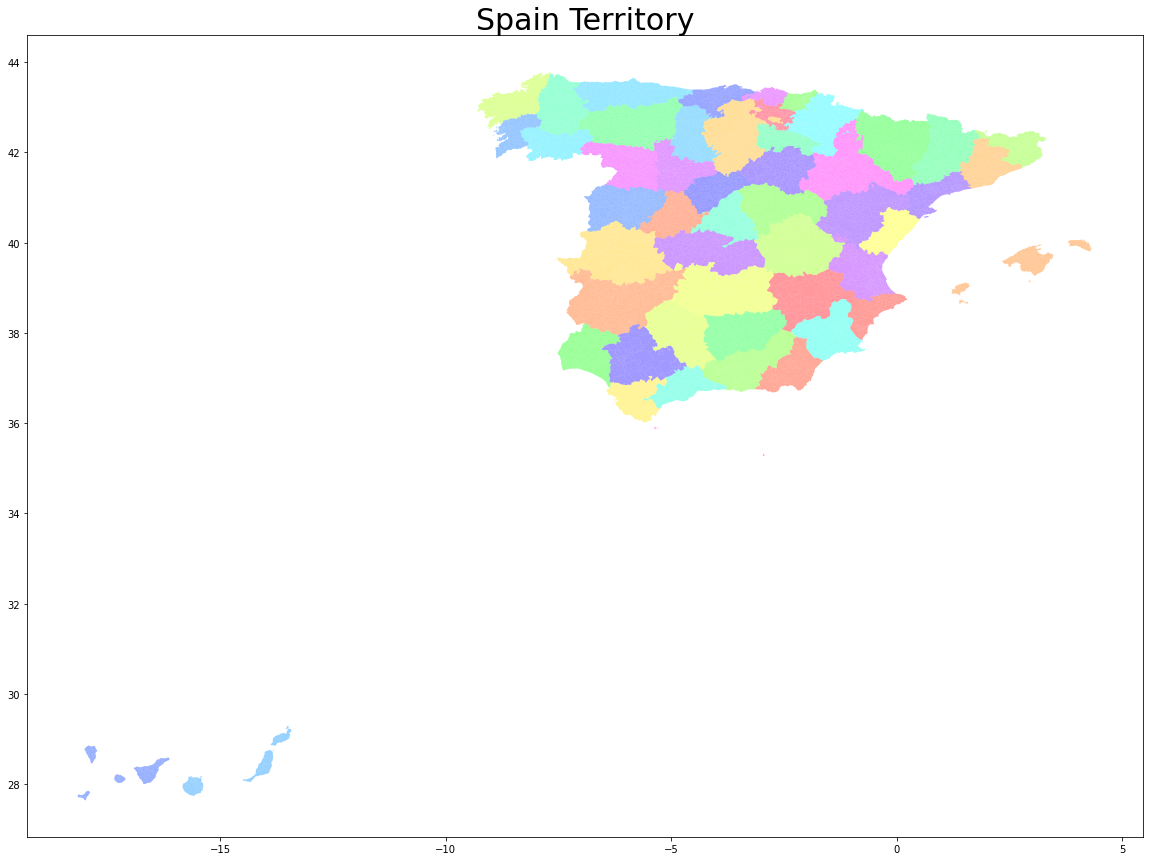

In [131]:
# Spain Shapes file - Data from 2015
spain_shapes = gpd.read_file('00 - Data/population/6ace4d4a-5ca9-43d6-acc0-81de35da62002020329-1-xmcwky.ni6eh.shp')
fig, ax = plt.subplots(figsize=(20,20))
spain_shapes.plot(ax=ax, alpha=0.4, column='Cod_Prov', cmap='gist_rainbow')
plt.title('Spain Territory', size=30);

In [132]:
# Filtering only Murcia Shapes
murcia_shapes = spain_shapes.copy().loc[spain_shapes.Cod_Prov == "30"]


----

#### Population Data 2021

In [133]:
# Population data updated

population = pd.read_csv('00 - Data/population_2021.csv', sep=';',decimal= ',' ,thousands=".")
population['Codigo Municipio'] = population['Codigo Municipio'].astype(str)

# we will transformate into integer, the numerical features
numerical_columns = ['Total','Hombres','Mujeres','TOTAL <16','Hombres <16','Mujeres <16','TOTAL 16-64','Hombres 16-64','Mujeres 16-64','TOTAL +65','Hombres +65','Mujeres +65']

population.head(2)

,Municipio,Total,Hombres,Mujeres,TOTAL <16,Hombres <16,Mujeres <16,TOTAL 16-64,Hombres 16-64,Mujeres 16-64,TOTAL +65,Hombres +65,Mujeres +65,Codigo Municipio,Superficie KM2
0,Abanilla,6047,3064,2983,792,416,376,3680,1922,1758,1575,726,849,30001,235.62
1,Abarán,13080,6525,6555,2082,1025,1057,8690,4501,4189,2308,999,1309,30002,115.04


We will merge this file with our original files of shapes, in order to get more updated values for population, and also splitted by sex and age

In [134]:
merged_population = pd.merge(murcia_shapes, population, how='left', left_on = 'Codigo', right_on='Codigo Municipio')

In [135]:
merged_population.head(1).transpose()

,0
FID,4561
OBJECTID_1,4561
OBJECTID,4561
Codigo,30001
Texto,Abanilla
Cod_Prov,30
Cod_CCAA,14
NUTS_0,ES
NUTS_1,ES6
NUTS_2,ES62


In [136]:
# we will delete some unnecesary columns
drop_columns = ['Cod_Prov','Cod_CCAA','NUTS_0','NUTS_1','NUTS_2','NUTS_3','Poblacion'] # we delete poblacion since we have the value from 2021 dataset
merged_population = merged_population.drop(drop_columns, axis=1)

# Visualizations

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


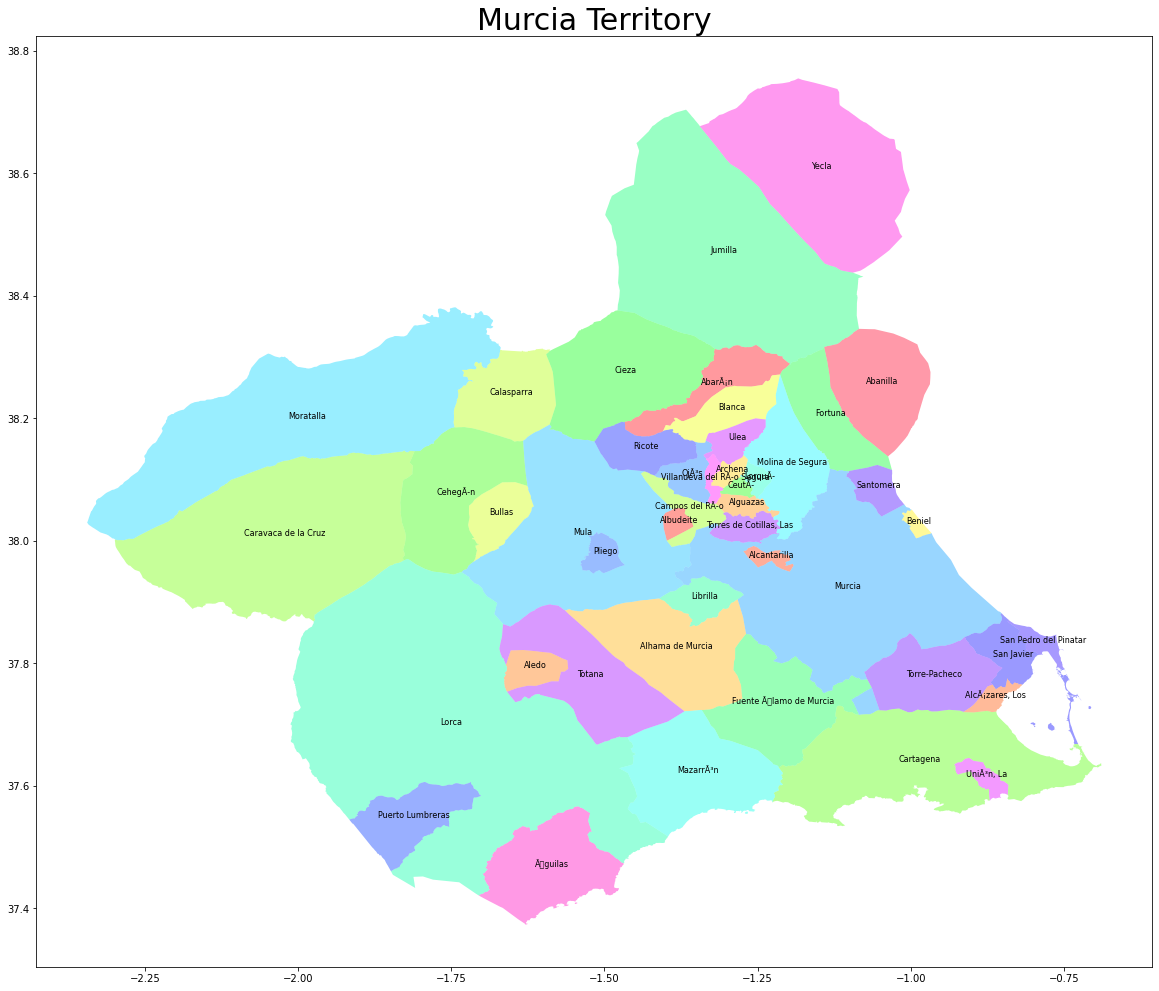

In [137]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population.plot(ax=ax, alpha=0.4, column='Texto', cmap='gist_rainbow')
plt.title('Murcia Territory', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population.iterrows():
    annotation_text = row['Texto']
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


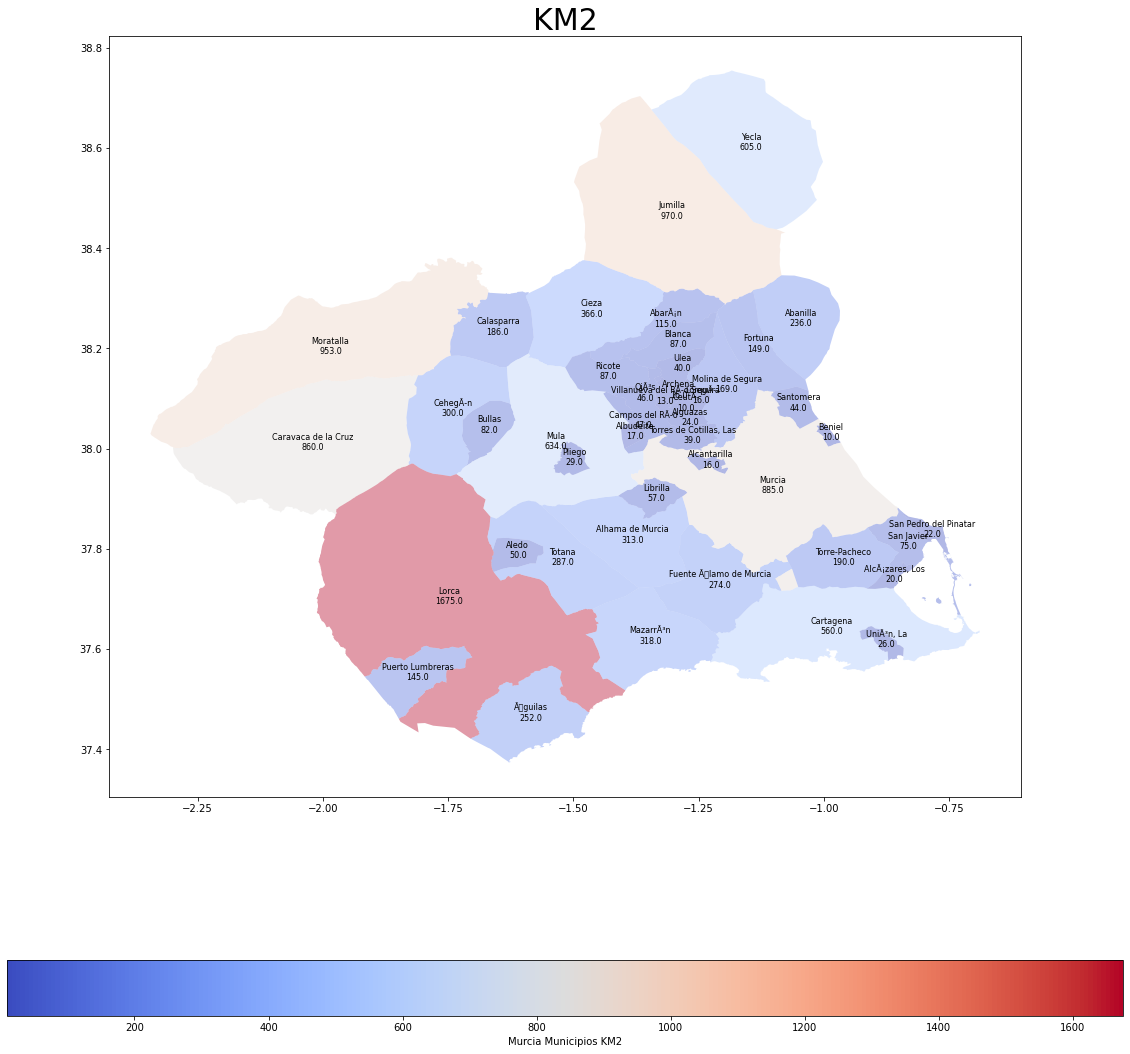

In [141]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population.plot(ax=ax, alpha=0.4, column='Superficie KM2', cmap='coolwarm',legend=True,  
                      legend_kwds={"label": "Murcia Municipios KM2", "orientation": "horizontal"})
plt.title('KM2', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['Superficie KM2'],0))
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


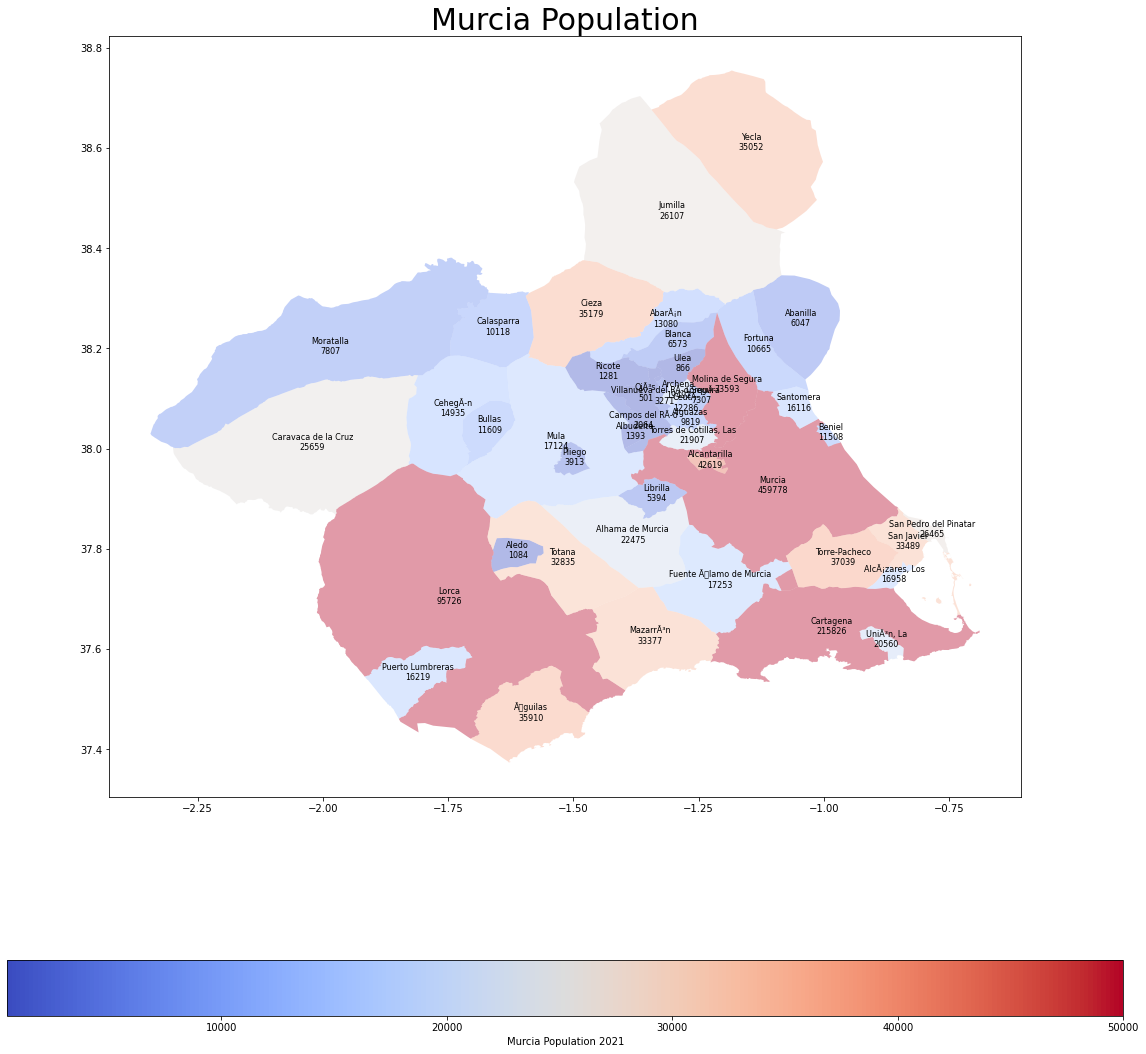

In [142]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population.plot(ax=ax, alpha=0.4, column='Total', cmap='coolwarm',legend=True,  vmax=50000,
                      legend_kwds={"label": "Murcia Population 2021", "orientation": "horizontal"})
plt.title('Murcia Population', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population.iterrows():
    annotation_text = row['Texto'] + '\n'+str(row['Total'])
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

As we can see, the refions with more population are:
* Murcia: 459778
* Cartagena: 215826
* Lorca: 95726
* Molina de Segura: 73593

In [144]:
merged_population['total_density'] = merged_population['Total'] / merged_population['Superficie KM2']

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


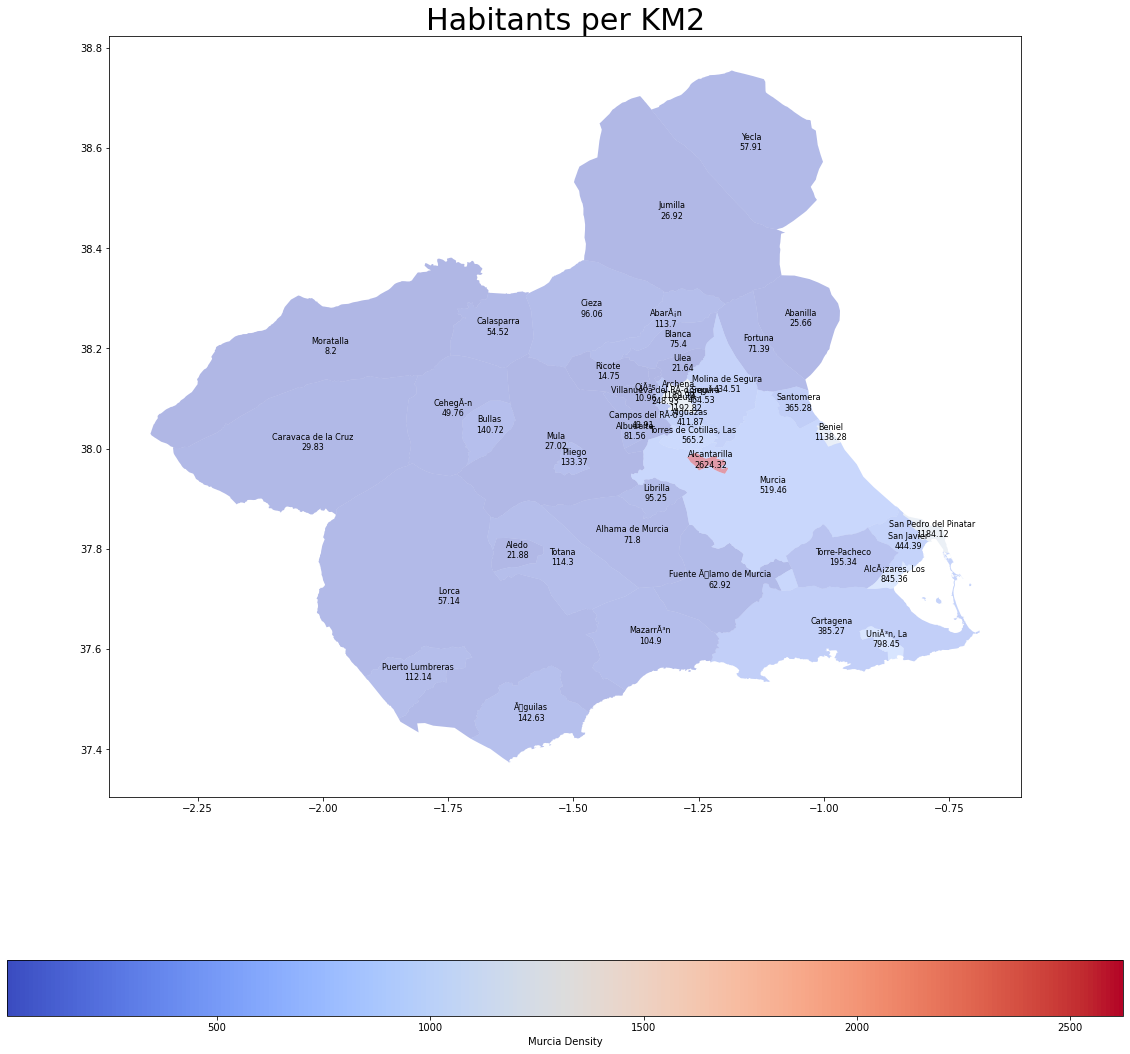

In [146]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population.plot(ax=ax, alpha=0.4, column='total_density', cmap='coolwarm',legend=True,  
                      legend_kwds={"label": "Murcia Density", "orientation": "horizontal"})
plt.title('Habitants per KM2', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['total_density'],2))
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


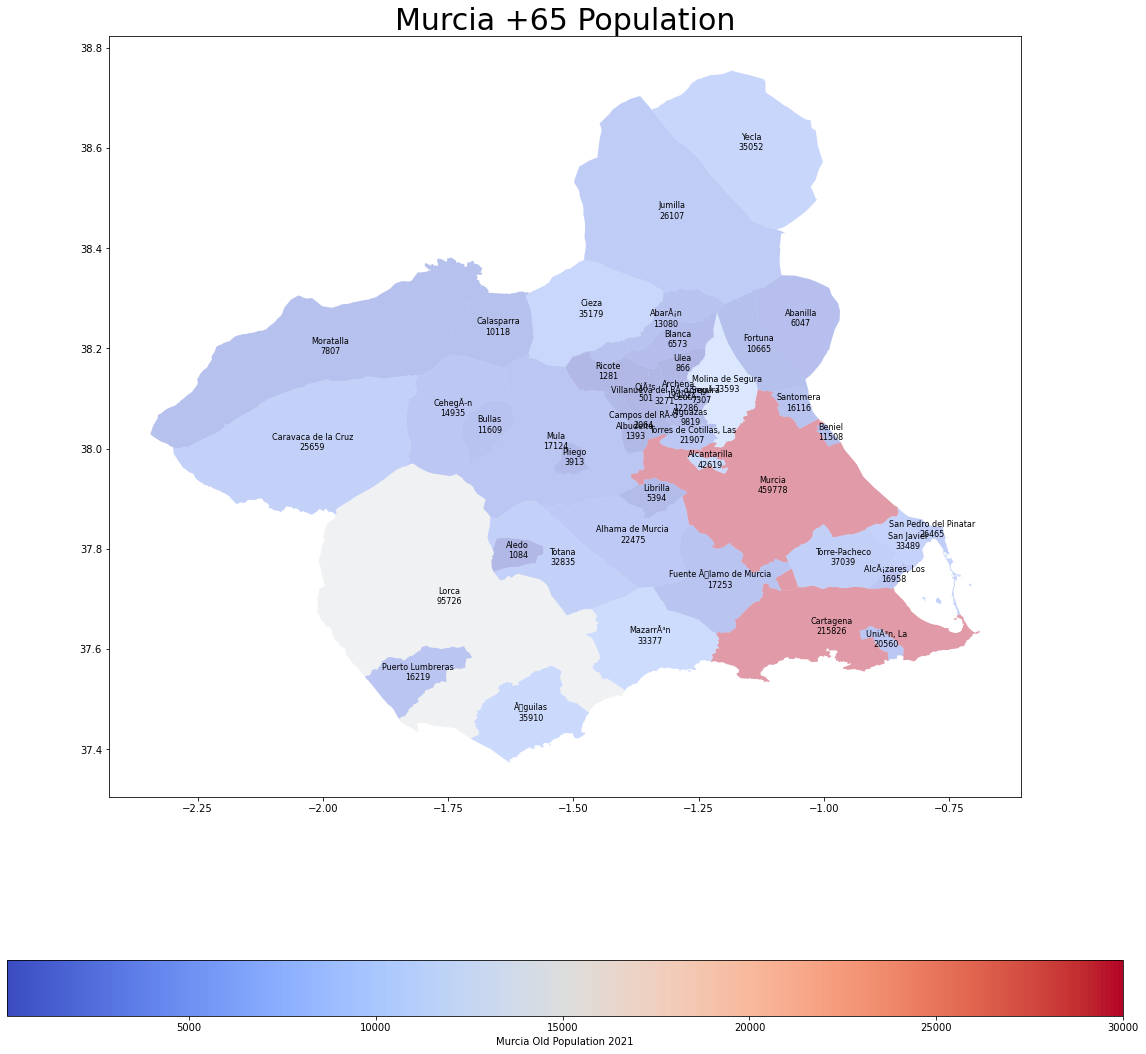

In [147]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population.plot(ax=ax, alpha=0.4, column='TOTAL +65', cmap='coolwarm',legend=True,  vmax=30000,
                      legend_kwds={"label": "Murcia Old Population 2021", "orientation": "horizontal"})
plt.title('Murcia +65 Population', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population.iterrows():
    annotation_text = row['Texto'] + '\n'+str(row['Total'])
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

Makes sense that the same pattern applies if we filter by +65 population.

But, under the assumption that older population is more likely to need medicine, we will analyze the ratio of +65 over total, per each location

In [148]:
display('Tail Municipios per Pharmacies over Older population',
        merged_population.sort_values(by = 'TOTAL +65',ascending=False)[['Municipio','TOTAL +65']].head(5))

'Tail Municipios per Pharmacies over Older population'

,Municipio,TOTAL +65
29,Murcia,73633
15,Cartagena,37554
23,Lorca,14588
26,Molina de Segura,9637
25,Mazarrón,6830


In [149]:
merged_population['65_ratio'] = merged_population['TOTAL +65'] / merged_population['Total']

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


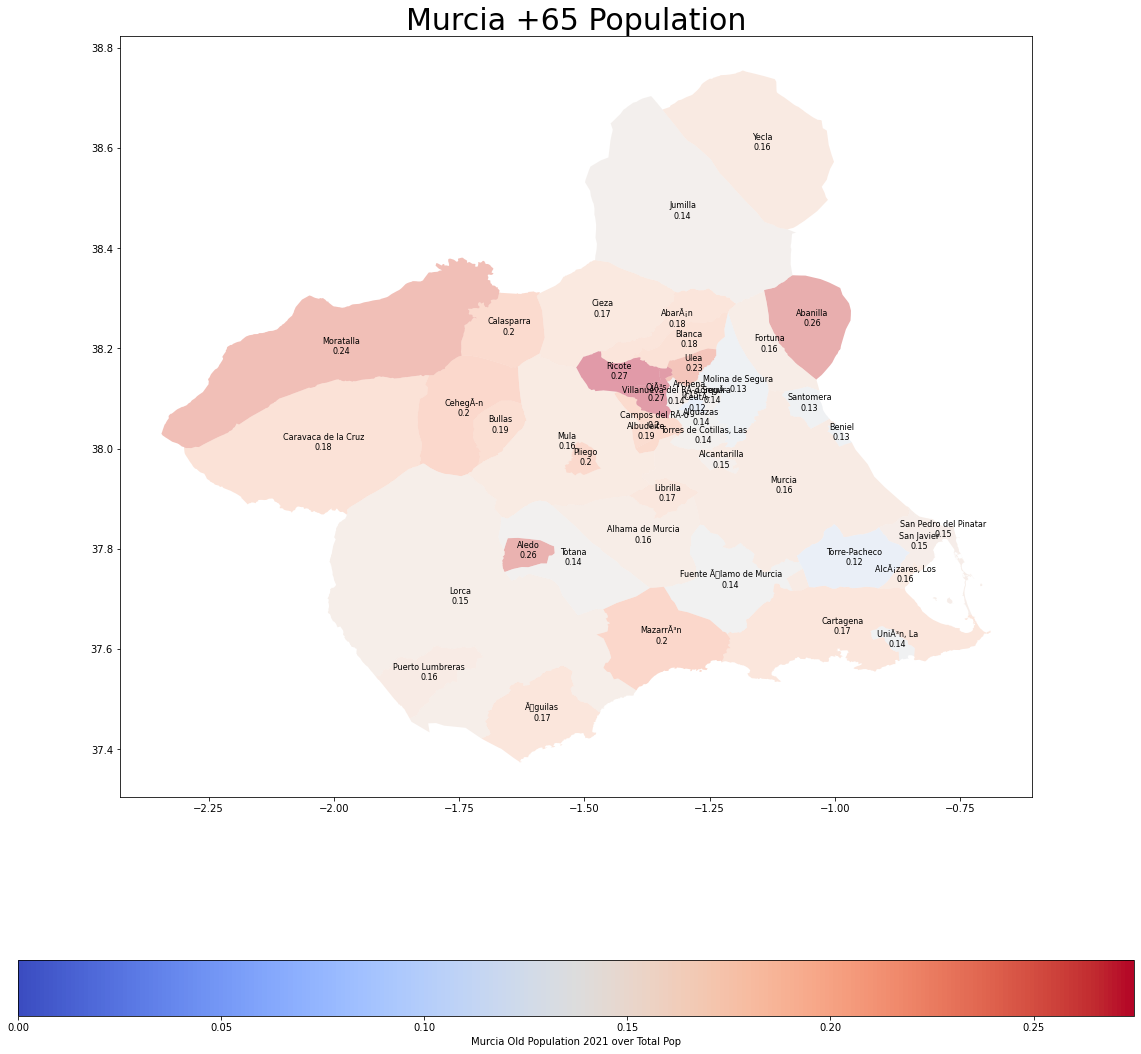

In [150]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population.plot(ax=ax, alpha=0.4, column='65_ratio', cmap='coolwarm',legend=True, vmin = 0,
                      legend_kwds={"label": "Murcia Old Population 2021 over Total Pop", "orientation": "horizontal"})
plt.title('Murcia +65 Population', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['65_ratio'],2))
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

In this case, while plotting the % of people older than 65 Years, we found that the top locations are:


In [151]:
display('Tail Municipios per Pharmacies over Older population',
        merged_population.sort_values(by = '65_ratio',ascending=False)[['Municipio','65_ratio']].head(5))

'Tail Municipios per Pharmacies over Older population'

,Municipio,65_ratio
33,Ricote,0.274785
30,Ojós,0.273453
0,Abanilla,0.260460
5,Aledo,0.255535
27,Moratalla,0.240425


## Poblational +65 density per Km2

In [152]:
merged_population['older_density'] = merged_population['TOTAL +65'] / merged_population['Superficie KM2']

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


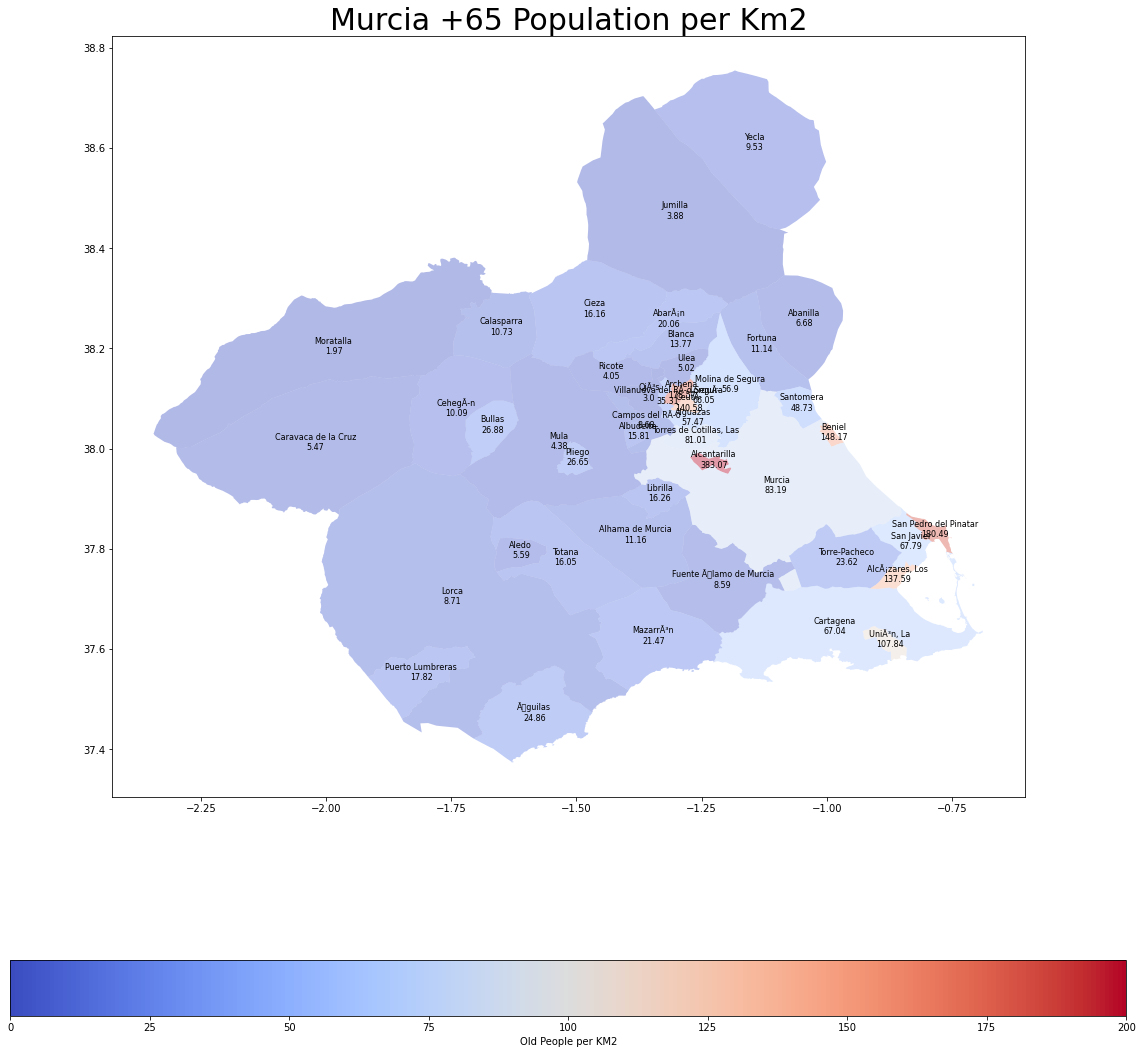

In [154]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population.plot(ax=ax, alpha=0.4, column='older_density', cmap='coolwarm',legend=True, vmin = 0, vmax=200,
                      legend_kwds={"label": "Old People per KM2", "orientation": "horizontal"})
plt.title('Murcia +65 Population per Km2', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['older_density'],2))
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

In [157]:
display('Top Municipios with more older population per KM2',
        merged_population.sort_values(by = 'older_density',ascending=False)[['Municipio','TOTAL +65','Superficie KM2','older_density']].head(5))

'Top Municipios with more older population per KM2'

,Municipio,TOTAL +65,Superficie KM2,older_density
4,Alcantarilla,6221,16.24,383.066502
35,San Pedro del Pinatar,4034,22.35,180.492170
8,Archena,2925,16.38,178.571429
9,Beniel,1498,10.11,148.170129
17,Ceutí,1448,10.30,140.582524


---

## Plotting distribution of Pharmacies

In [158]:
merged_population_pharma = pd.merge(merged_population, summarized_pharmacies, how='left', left_on = 'Codigo', right_on='Code')

In [159]:
merged_population_pharma.head(2)

,FID,OBJECTID_1,OBJECTID,Codigo,Texto,geometry,Municipio,Total,Hombres,Mujeres,...,TOTAL +65,Hombres +65,Mujeres +65,Codigo Municipio,Superficie KM2,total_density,65_ratio,older_density,Code,count_pharmacies
0,4561,4561,4561,30001,Abanilla,"POLYGON ((-1.06881 38.34574, -1.05858 38.34556...",Abanilla,6047,3064,2983,...,1575,726,849,30001,235.62,25.664205,0.260460,6.684492,30001,4
1,4562,4562,4562,30002,AbarÃ¡n,"POLYGON ((-1.25228 38.32006, -1.24502 38.31526...",Abarán,13080,6525,6555,...,2308,999,1309,30002,115.04,113.699583,0.176453,20.062587,30002,4


C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


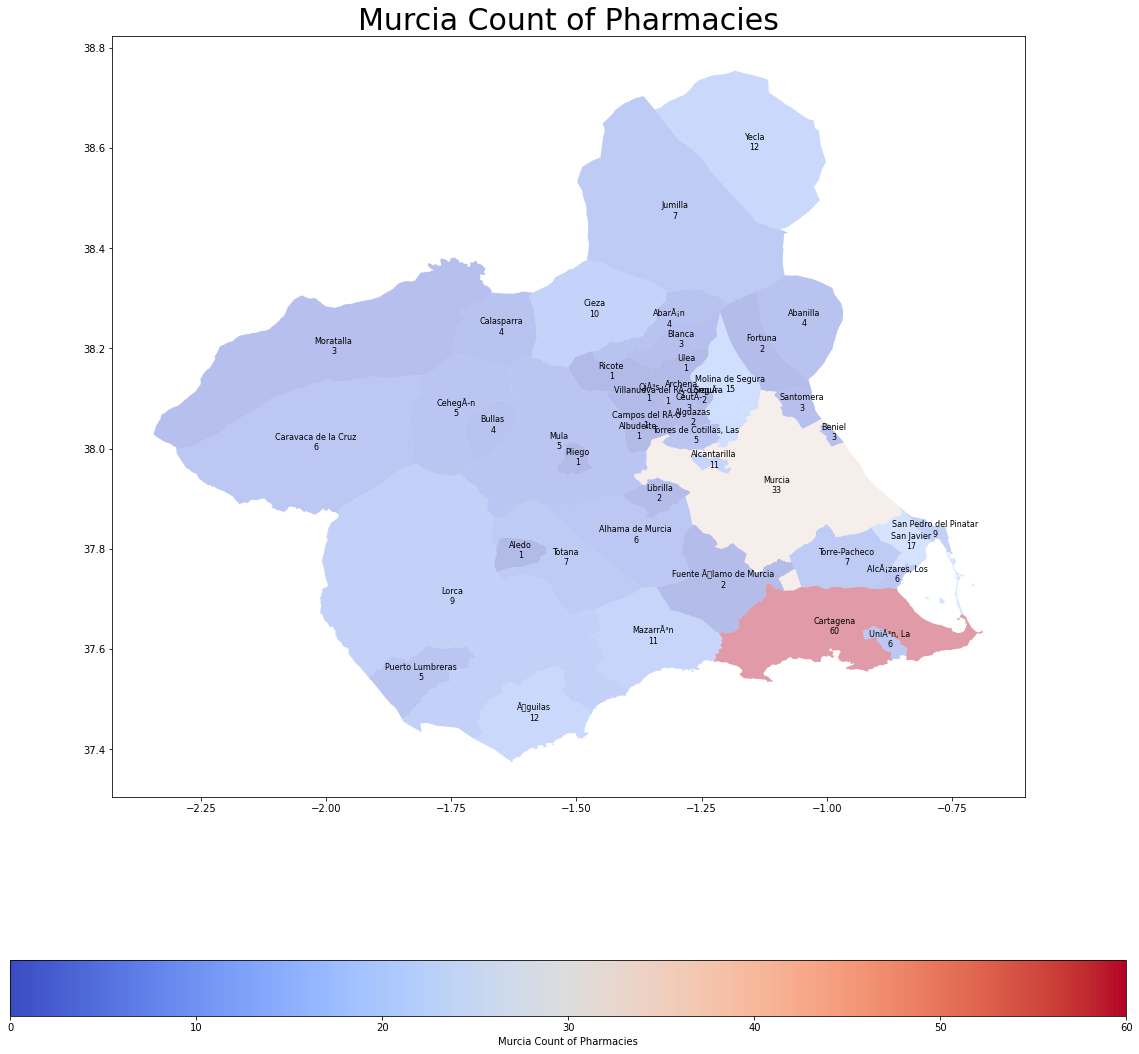

In [160]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population_pharma.plot(ax=ax, alpha=0.4, column='count_pharmacies', cmap='coolwarm',legend=True, vmin = 0,
                      legend_kwds={"label": "Murcia Count of Pharmacies", "orientation": "horizontal"})
plt.title('Murcia Count of Pharmacies', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population_pharma.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['count_pharmacies'],0))
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

As we can notice, we have a high concentration of pharmacies in Cartagena and Murcia, two of the most populated Municipios of Murcia.

---

# Pharmacies over total Population (expressed per K habitants)

In [161]:
merged_population_pharma['pharma_over_total_K'] = merged_population_pharma['count_pharmacies'] / (merged_population_pharma['Total'] / 1000)

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


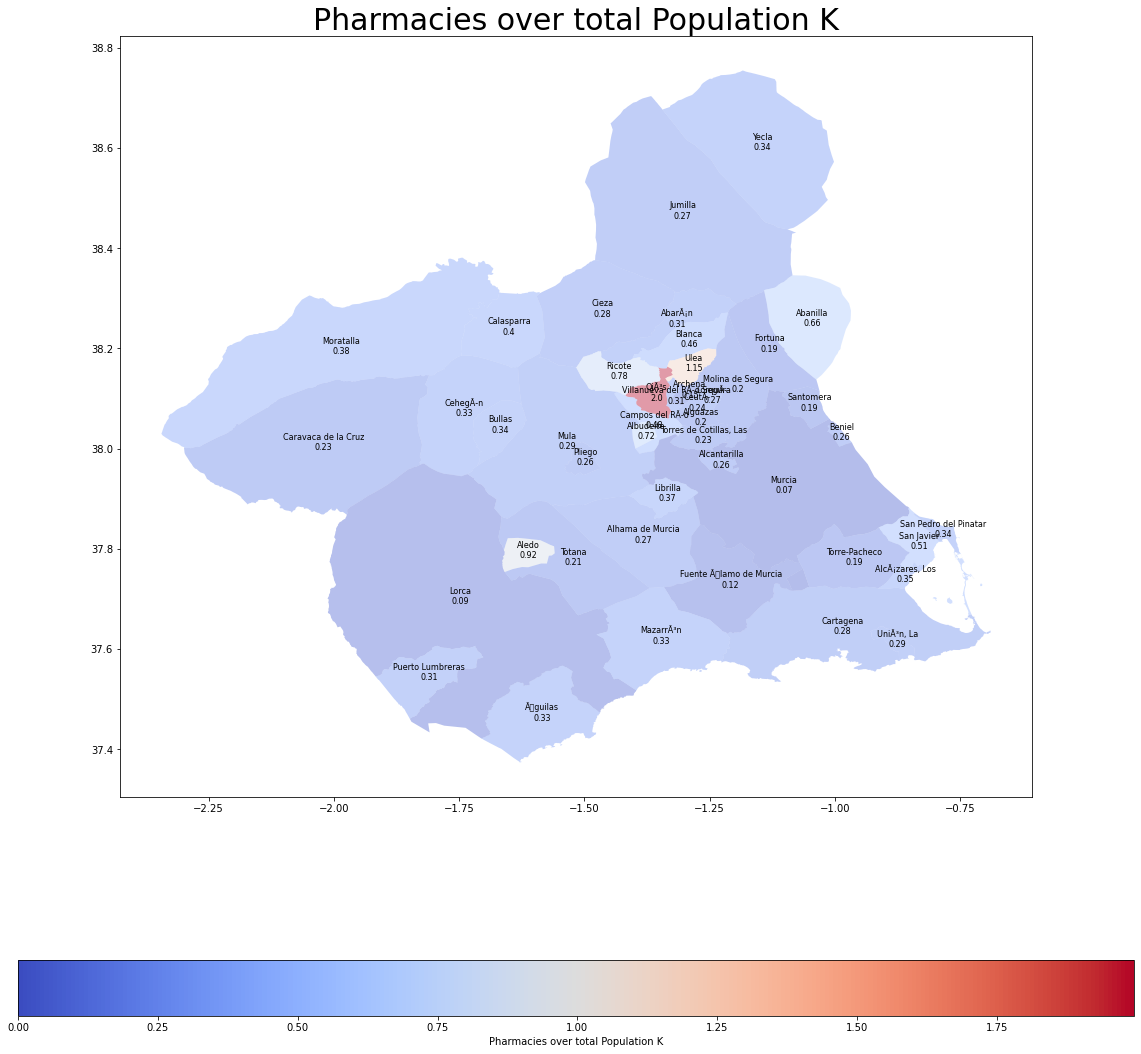

In [162]:
fig, ax = plt.subplots(figsize=(20,20))
merged_population_pharma.plot(ax=ax, alpha=0.4, column='pharma_over_total_K', cmap='coolwarm',legend=True, vmin = 0,
                      legend_kwds={"label": "Pharmacies over total Population K", "orientation": "horizontal"})
plt.title('Pharmacies over total Population K', size=30);

# Add annotations for 'total' values in Map 1
for idx, row in merged_population_pharma.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['pharma_over_total_K'],2))
    ax.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

In [163]:
display('Top Municipios per Pharmacies over total population',merged_population_pharma.sort_values(by = 'pharma_over_total_K',ascending=False)[['Municipio','Total','count_pharmacies','pharma_over_total_K']].head(5))

'Top Municipios per Pharmacies over total population'

,Municipio,Total,count_pharmacies,pharma_over_total_K
30,Ojós,501,1,1.996008
39,Ulea,866,1,1.154734
5,Aledo,1084,1,0.922509
33,Ricote,1281,1,0.780640
3,Albudeite,1393,1,0.717875


In [164]:
display('Tail Municipios per Pharmacies over total population',merged_population_pharma.sort_values(by = 'pharma_over_total_K',ascending=False)[['Municipio','Total','count_pharmacies','pharma_over_total_K']].tail(5))

'Tail Municipios per Pharmacies over total population'

,Municipio,Total,count_pharmacies,pharma_over_total_K
43,Santomera,16116,3,0.186150
8,Archena,19492,3,0.153909
20,Fuente Álamo,17253,2,0.115922
23,Lorca,95726,9,0.094018
29,Murcia,459778,33,0.071774


An intersting founding here, is beyond the fact that Murcia and Lorca are some of the most populated municipios, they have lower ratios of pharmacies over total population, so it may represent a good opportunity for investment.

---

## Pharmacies over Older Population

In [165]:
merged_population_pharma['pharma_over_older_K'] = merged_population_pharma['count_pharmacies'] / (merged_population_pharma['TOTAL +65'] / 1000)
merged_population_pharma['pharma_over_older_ratio'] = merged_population_pharma['count_pharmacies'] / (merged_population_pharma['65_ratio'])

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\geopandas\plotting.py:649: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.draw()
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Glyph 129 (\x81) missing from current font.
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


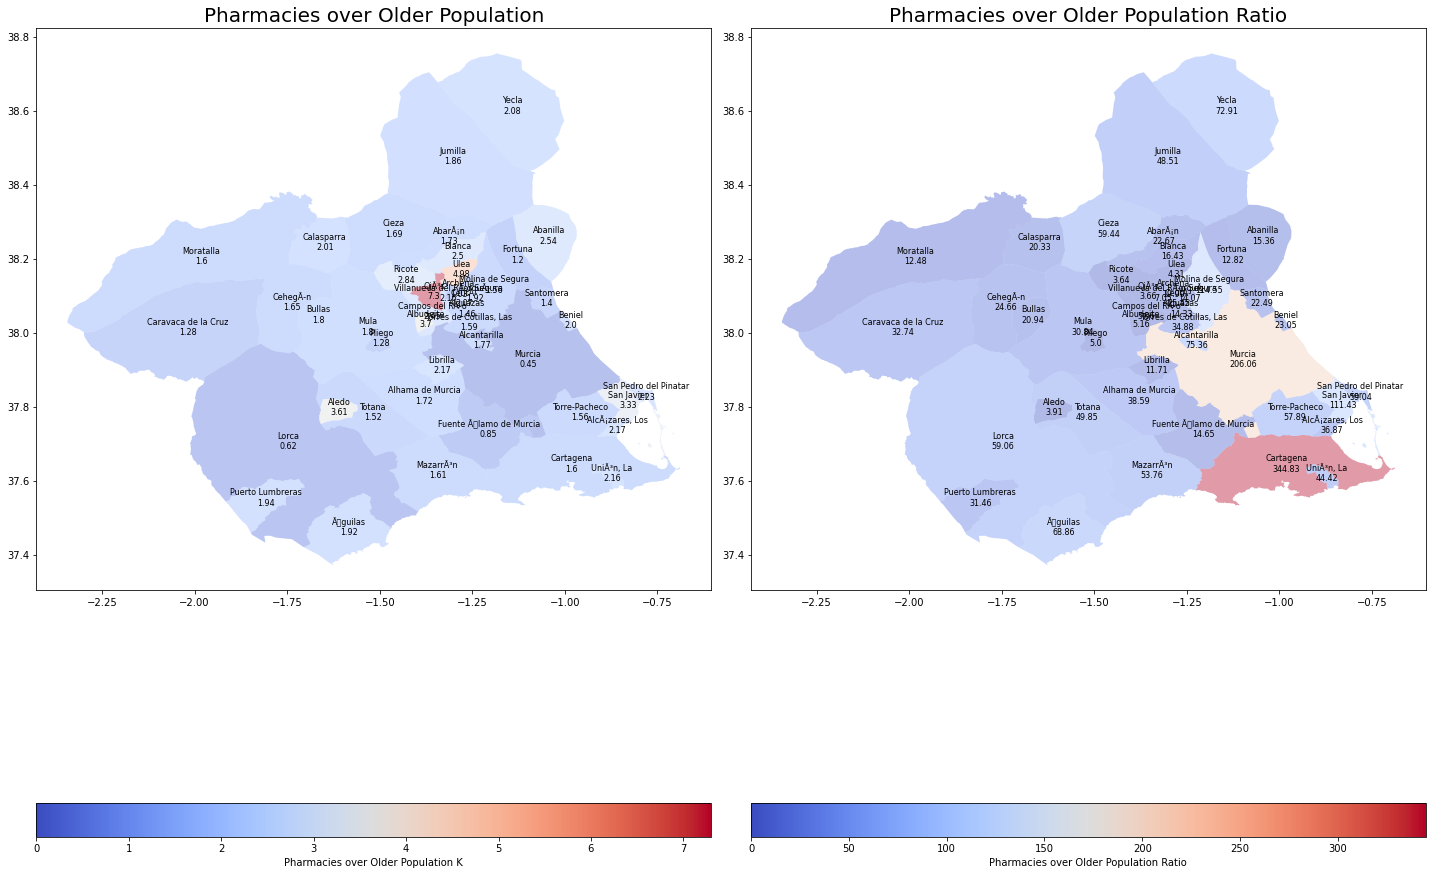

In [166]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

    # Plot the first map
ax1 = axes[0]

ax1.set_title('Pharmacies over Older Population', size=20)
merged_population_pharma.plot(ax=ax1, alpha=0.4, column='pharma_over_older_K', cmap='coolwarm',legend=True, vmin = 0,
                      legend_kwds={"label": "Pharmacies over Older Population K", "orientation": "horizontal"})

# Add annotations for 'total' values in Map 1
for idx, row in merged_population_pharma.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['pharma_over_older_K'],2))
    ax1.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

# Plot the second map
ax2 = axes[1]
# Customize ax2 settings as needed
ax2.set_title('Pharmacies over Older Population Ratio', size=20)
merged_population_pharma.plot(ax=ax2, alpha=0.4, column='pharma_over_older_ratio', cmap='coolwarm',legend=True, vmin = 0,
                      legend_kwds={"label": "Pharmacies over Older Population Ratio", "orientation": "horizontal"})

# Add annotations for 'total' values in Map 1
for idx, row in merged_population_pharma.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['pharma_over_older_ratio'],2))
    ax2.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

plt.tight_layout()
plt.show()

In [167]:
display('Tail Municipios per Pharmacies over Older population',
        merged_population_pharma.sort_values(by = 'pharma_over_older_K',ascending=False)[['Municipio','TOTAL +65','count_pharmacies','pharma_over_older_K']].tail(5))

'Tail Municipios per Pharmacies over Older population'

,Municipio,TOTAL +65,count_pharmacies,pharma_over_older_K
19,Fortuna,1664,2,1.201923
8,Archena,2925,3,1.025641
20,Fuente Álamo,2355,2,0.849257
23,Lorca,14588,9,0.616945
29,Murcia,73633,33,0.448169


In [168]:
display('Tail Municipios per Pharmacies over Older population Ratio',
        merged_population_pharma.sort_values(by = 'pharma_over_older_ratio',ascending=False)[['Municipio','TOTAL +65','count_pharmacies','pharma_over_older_ratio']].tail(5))

'Tail Municipios per Pharmacies over Older population Ratio'

,Municipio,TOTAL +65,count_pharmacies,pharma_over_older_ratio
31,Pliego,782,1,5.003836
39,Ulea,201,1,4.308458
5,Aledo,277,1,3.913357
30,Ojós,137,1,3.656934
33,Ricote,352,1,3.639205


## Pharmacies over Population Density

In [169]:
merged_population_pharma['pharma_over_older_density'] = merged_population_pharma['count_pharmacies'] / (merged_population_pharma['older_density'])
merged_population_pharma['pharma_over_total_density'] = merged_population_pharma['count_pharmacies'] / (merged_population_pharma['total_density'])

C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\geopandas\plotting.py:649: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.draw()
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Glyph 129 (\x81) missing from current font.
C:\Users\juans\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


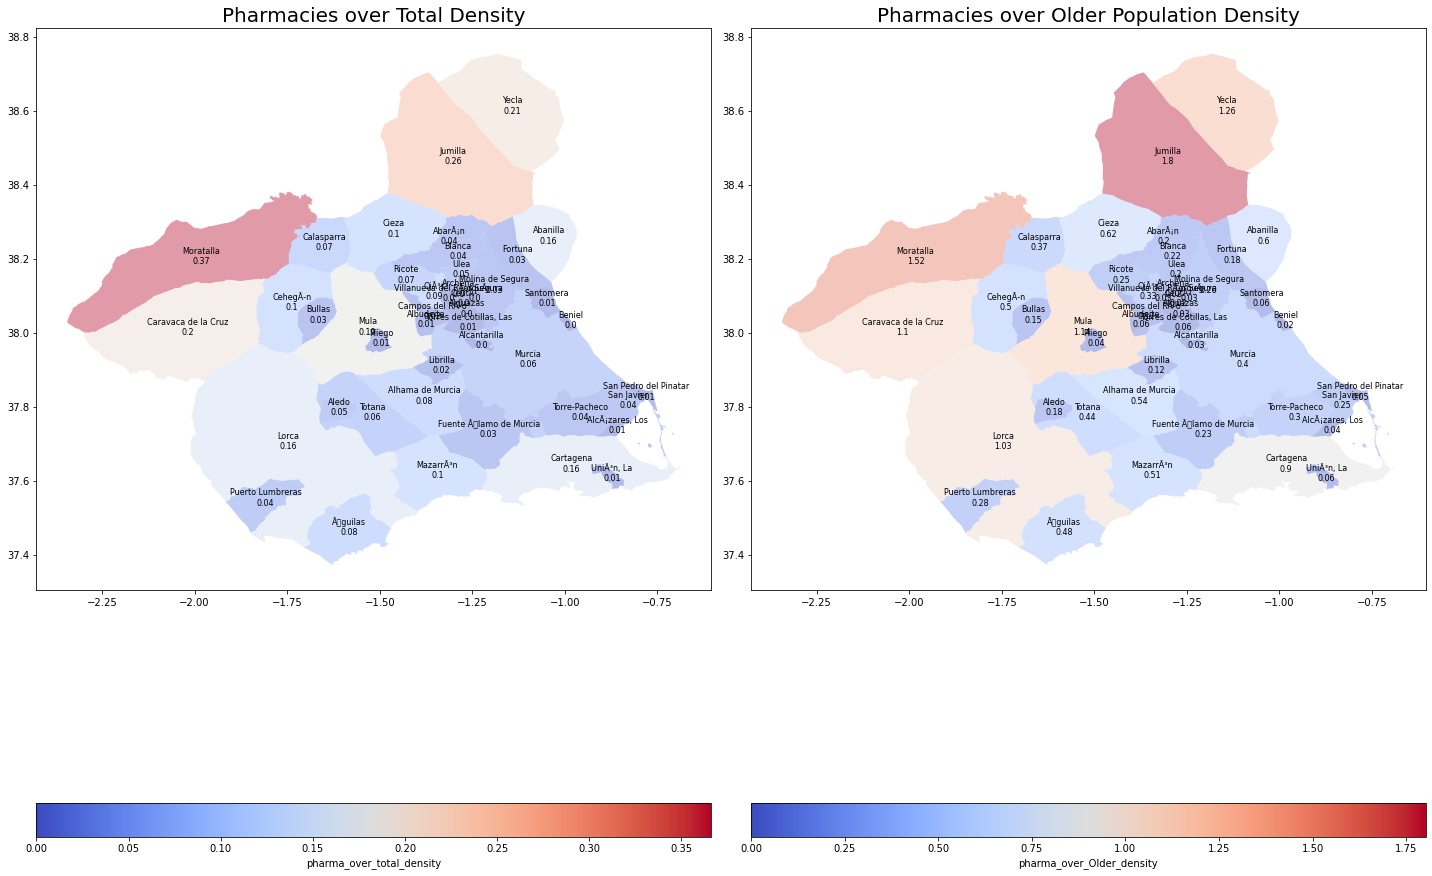

In [171]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

    # Plot the first map
ax1 = axes[0]

ax1.set_title('Pharmacies over Total Density', size=20)
merged_population_pharma.plot(ax=ax1, alpha=0.4, column='pharma_over_total_density', cmap='coolwarm',legend=True, vmin = 0,
                      legend_kwds={"label": "pharma_over_total_density", "orientation": "horizontal"})

# Add annotations for 'total' values in Map 1
for idx, row in merged_population_pharma.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['pharma_over_total_density'],2))
    ax1.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

# Plot the second map
ax2 = axes[1]
# Customize ax2 settings as needed
ax2.set_title('Pharmacies over Older Population Density', size=20)
merged_population_pharma.plot(ax=ax2, alpha=0.4, column='pharma_over_older_density', cmap='coolwarm',legend=True, vmin = 0,
                      legend_kwds={"label": "pharma_over_Older_density", "orientation": "horizontal"})

# Add annotations for 'total' values in Map 1
for idx, row in merged_population_pharma.iterrows():
    annotation_text = row['Texto'] + '\n'+str(round(row['pharma_over_older_density'],2))
    ax2.annotate(text=annotation_text,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, color='black')

plt.tight_layout()
plt.show()

In [175]:
display('Municipios with less pharmacies per density',
        merged_population_pharma.sort_values(by = 'pharma_over_total_density',ascending=False)[['Municipio','Superficie KM2','count_pharmacies',
                                                                                                'Total','total_density','pharma_over_total_density']].tail(5))

'Municipios with less pharmacies per density'

,Municipio,Superficie KM2,count_pharmacies,Total,total_density,pharma_over_total_density
4,Alcantarilla,16.24,11,42619,2624.322660,0.004192
41,Villanueva del Río Segura,13.14,1,3271,248.934551,0.004017
9,Beniel,10.11,3,11508,1138.278932,0.002636
8,Archena,16.38,3,19492,1189.987790,0.002521
17,Ceutí,10.30,3,12286,1192.815534,0.002515


In [177]:
display('Municipios with less pharmacies per old people density',
        merged_population_pharma.sort_values(by = 'pharma_over_older_density',ascending=False)[['Municipio','Superficie KM2','count_pharmacies',
                                                                                                'TOTAL +65','older_density','pharma_over_older_density']].tail(5))

'Municipios with less pharmacies per old people density'

,Municipio,Superficie KM2,count_pharmacies,TOTAL +65,older_density,pharma_over_older_density
4,Alcantarilla,16.24,11,6221,383.066502,0.028716
41,Villanueva del Río Segura,13.14,1,464,35.312024,0.028319
17,Ceutí,10.30,3,1448,140.582524,0.021340
9,Beniel,10.11,3,1498,148.170129,0.020247
8,Archena,16.38,3,2925,178.571429,0.016800


---

# Summary and Recommendations

In strategically determining locations for new pharmacies in Murcia, it is essential to consider the demographic characteristics of the region. 

Murcia, with a population of 459,778, serves as the cultural and economic heart, blending historical charm with modern amenities. Focusing on the most populated municipios, particularly <mark>Murcia itself, Cartagena, Lorca, and Molina de Segura </mark>, ensures access to healthcare services for a significant portion of the population. 

Additionally, prioritizing municipios with a higher concentration of elderly residents, such as <mark>Murcia, Cartagena, and Lorca </mark>, recognizes the growing healthcare needs of this demographic. 

Furthermore, considering municipios with fewer pharmacies relative to the total population, such as <mark>Santomera, Archena, and Fuente Álamo </mark>, offers an opportunity to address potential gaps in healthcare services. 

Similarly, targeting areas with fewer pharmacies per older individual, as observed in <mark>Fortuna and Archena</mark>, aligns with the specific healthcare needs of the elderly population. Balancing these factors and selecting municipios with a strategic combination of population density and healthcare service gaps can guide the successful establishment of new pharmacies in <mark>Murcia</mark>.


To summaryze, if we need to prioritize some Municipios based on mentioned analysis, I will suggest:
* Murcia: Since has less pharmacies per older people, and also it's one of the most populated Municipios
* Lorca: Low ratio of pharmacies over older people, also high populated Municipio
* Fuente Álamo: Only two pharmacies to take care of 2355 older people
* Pliego: Has a big ratio of Older people over total population, and also less ammount of pharmacies.
* Archena: since has the lowest ratio of pharmacies over total population density, and pharmacies over old population density.


<img src = "https://media1.giphy.com/media/5xtDarmwsuR9sDRObyU/giphy.gif?cid=6c09b952hplvrf15fg2ygb19wh1mcp6f5d7xcvx71e0wm021&ep=v1_internal_gif_by_id&rid=giphy.gif&ct=g">

----